In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df=pd.read_csv('/content/covid_19_clean_complete.csv')

In [7]:
print(df.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None


In [9]:
print(df.isnull().sum())

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [10]:
df = df.drop(columns=['Province/State'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  49068 non-null  object 
 1   Lat             49068 non-null  float64
 2   Long            49068 non-null  float64
 3   Date            49068 non-null  object 
 4   Confirmed       49068 non-null  int64  
 5   Deaths          49068 non-null  int64  
 6   Recovered       49068 non-null  int64  
 7   Active          49068 non-null  int64  
 8   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


In [12]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
print(df['Date'].head())

0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: Date, dtype: datetime64[ns]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


In [14]:
df.isnull().sum()

,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [15]:
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

In [16]:
print(df['Date'].head())

0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: Date, dtype: datetime64[ns]


In [18]:
print(df[['Date', 'Days', 'Confirmed', 'Deaths', 'Recovered']].head())

        Date  Days  Confirmed  Deaths  Recovered
0 2020-01-22     0          0       0          0
1 2020-01-22     0          0       0          0
2 2020-01-22     0          0       0          0
3 2020-01-22     0          0       0          0
4 2020-01-22     0          0       0          0


In [19]:
# Check for dates with confirmed cases greater than 0
non_zero_cases = df[df['Confirmed'] > 0]
print(non_zero_cases[['Date', 'Confirmed', 'Deaths', 'Recovered']].drop_duplicates())

            Date  Confirmed  Deaths  Recovered
48    2020-01-22          1       0          0
49    2020-01-22         14       0          0
50    2020-01-22          6       0          0
53    2020-01-22         26       0          0
54    2020-01-22          2       0          0
...          ...        ...     ...        ...
49063 2020-07-27        865      14        734
49064 2020-07-27       1691     483        833
49065 2020-07-27        354       7        328
49066 2020-07-27       7235      60       6028
49067 2020-07-27        505      12        128

[36595 rows x 4 columns]


In [25]:
# Step 1: Aggregate the data by Date
aggregated_df = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Step 2: Convert Date to datetime if not already done
aggregated_df['Date'] = pd.to_datetime(aggregated_df['Date'])

# Step 3: Calculate the number of days since the first confirmed case
first_case_date = aggregated_df[aggregated_df['Confirmed'] > 0]['Date'].min()
aggregated_df['Days'] = (aggregated_df['Date'] - first_case_date).dt.days

# Step 4: Create feature set and target variable
X = aggregated_df[['Days', 'Deaths', 'Recovered']]  # Feature set
y = aggregated_df['Confirmed']  # Target variable


print(aggregated_df[['Date', 'Days', 'Confirmed', 'Deaths', 'Recovered']].head())

        Date  Days  Confirmed  Deaths  Recovered
0 2020-01-22     0        555      17         28
1 2020-01-23     1        654      18         30
2 2020-01-24     2        941      26         36
3 2020-01-25     3       1434      42         39
4 2020-01-26     4       2118      56         52


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
degree = 3   #after degree 3 the model is overfitting
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [114]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [115]:
# Step 4: Make predictions
y_pred = model.predict(X_test_poly)

In [116]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [117]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Root Mean Squared Error (RMSE): 90265.66847142161
R-squared: 0.999663834818118


In [118]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 65856.29802732223


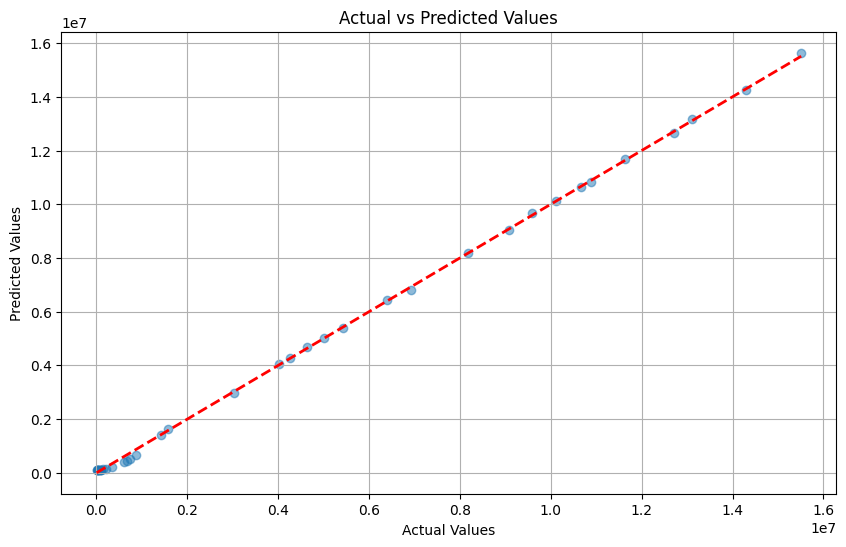

In [119]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

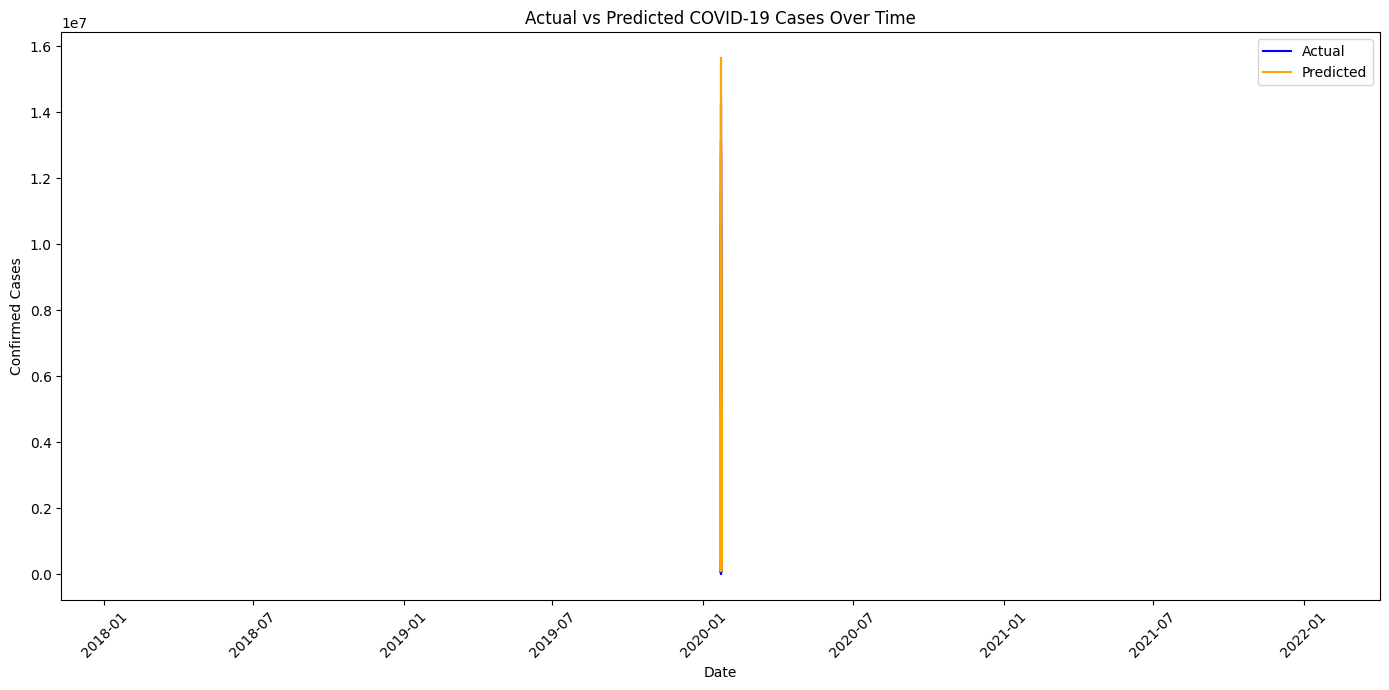

In [120]:
# Create a DataFrame for plotting
results = pd.DataFrame({'Date': df['Date'].iloc[y_test.index], 'Actual': y_test, 'Predicted': y_pred})

# Plot
plt.figure(figsize=(14, 7))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='orange')
plt.title('Actual vs Predicted COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

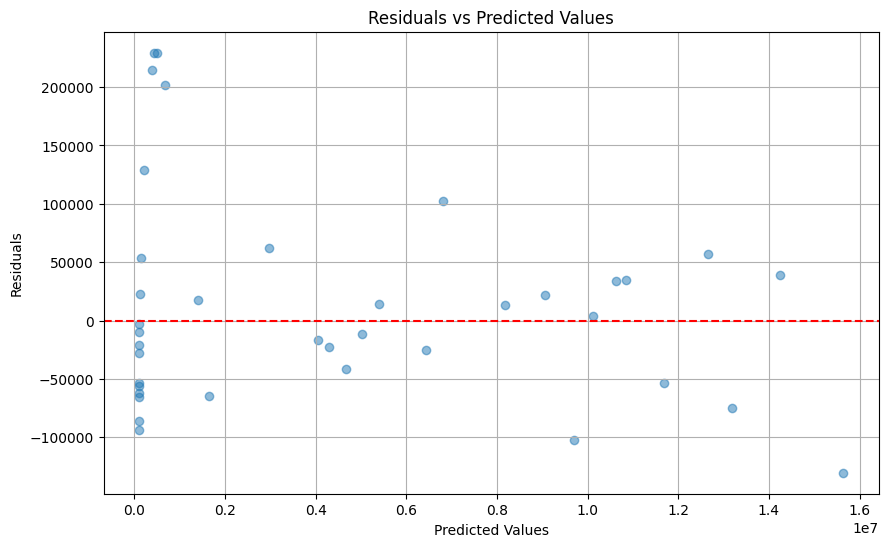

In [121]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()